### 数据

对原始数据进行随机划分，一部分用作训练集，剩下的用于测试模型性能。

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
df_origin = pd.read_csv('./data/emails_cleaned.csv')

In [4]:
# Remove rows containing missing values
df_origin.dropna(subset=['X'], inplace=True)
# Confirm that there is no missing values
df_origin.isnull().sum()

X    0
y    0
dtype: int64

In [5]:
df = df_origin.sample(frac=0.05, replace=False, random_state=88)

In [6]:
print('The dataset contains {} rows.'.format(df.shape[0]))

The dataset contains 39279 rows.


### 特征工程

我们使用 TF-IDF 将原始文本转化为数字特征从而让模型能够读取。

In [7]:
# Create a vectorization matrix using tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorized_emails = vectorizer.fit_transform(df.X)
vectorized_emails

<39279x32796 sparse matrix of type '<class 'numpy.float64'>'
	with 217837 stored elements in Compressed Sparse Row format>

### 实验

#### Train Test Split

In [10]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(vectorized_emails, df.y, test_size=test_size, random_state=88)

### Logistic Regression

In [11]:
logreg = LogisticRegression(C=10, solver='saga', penalty='elasticnet', 
                            l1_ratio=0.00001, max_iter=5000, verbose=0.05)

In [12]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 62 epochs took 195 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min finished


In [14]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob)

In [15]:
print(confusion_matrix(y_test, y_pred))

[[3373  665]
 [ 514 3304]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4038
           1       0.83      0.87      0.85      3818

    accuracy                           0.85      7856
   macro avg       0.85      0.85      0.85      7856
weighted avg       0.85      0.85      0.85      7856



In [17]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.8388341626891438


In [18]:
print(accuracy_score(y_test, y_pred))

0.8499236252545825


### Random Forest

In [19]:
rf = RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=10, 
                            n_estimators=500, random_state=88, verbose=0.5)

In [20]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished


In [21]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


In [22]:
print(confusion_matrix(y_test, y_pred))

[[2627 1411]
 [ 423 3395]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      4038
           1       0.71      0.89      0.79      3818

    accuracy                           0.77      7856
   macro avg       0.78      0.77      0.76      7856
weighted avg       0.79      0.77      0.76      7856



In [24]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.7366982032809651


In [25]:
print(accuracy_score(y_test, y_pred))

0.7665478615071283


### Gradient Boosting Machine

In [37]:
gboost = GradientBoostingClassifier(max_depth=50, n_estimators=300, verbose=0.1)

In [38]:
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3373           17.29m
         2           1.2979           16.89m
         3           1.2651           17.18m
         4           1.2365           16.23m
         5           1.2099           15.78m
         6           1.1854           15.41m
         7           1.1624           15.09m
         8           1.1425           14.68m
         9           1.1271           14.47m
        10           1.1095           14.30m
        11           1.0933           14.15m
        12           1.0765           14.11m
        13           1.0635           14.02m
        14           1.0520           13.92m
        15           1.0411           13.79m
        16           1.0299           13.82m
        17           1.0188           13.77m
        18           1.0088           13.70m
        19           0.9990           13.60m
        20           0.9892           13.59m
        21           0.9804           13.55m
        2

       183           0.5353            4.87m
       184           0.5341            4.83m
       185           0.5329            4.79m
       186           0.5317            4.74m
       187           0.5303            4.70m
       188           0.5292            4.66m
       189           0.5279            4.62m
       190           0.5265            4.57m
       191           0.5256            4.53m
       192           0.5236            4.48m
       193           0.5226            4.44m
       194           0.5216            4.40m
       195           0.5204            4.35m
       196           0.5196            4.31m
       197           0.5188            4.26m
       198           0.5182            4.22m
       199           0.5176            4.18m
       200           0.5167            4.14m
       201           0.5158            4.09m
       202           0.5145            4.05m
       203           0.5135            4.01m
       204           0.5123            3.97m
       205

In [45]:
y_pred_prob = gboost.predict_proba(X_test)[:, 1]
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_pred_prob)

In [39]:
print(confusion_matrix(y_test, y_pred))

[[3134  909]
 [ 452 3361]]


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4043
           1       0.79      0.88      0.83      3813

    accuracy                           0.83      7856
   macro avg       0.83      0.83      0.83      7856
weighted avg       0.83      0.83      0.83      7856



In [41]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.8043363806059446


In [42]:
print(accuracy_score(y_test, y_pred))

0.8267566191446029


### Multilayer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 30), max_iter=5000, solver='lbfgs', verbose=1)

In [16]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [46]:
y_pred_prob = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_prob)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[3414  629]
 [ 788 3025]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4043
           1       0.83      0.79      0.81      3813

    accuracy                           0.82      7856
   macro avg       0.82      0.82      0.82      7856
weighted avg       0.82      0.82      0.82      7856



In [22]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.8207173476585815


In [23]:
print(accuracy_score(y_test, y_pred))

0.8196283095723014


### Multinomial Naive Bayes

In [47]:
multiNB = MultinomialNB(alpha=0.1)

In [48]:
multiNB.fit(X_train, y_train)
y_pred = multiNB.predict(X_test)

In [49]:
y_pred_prob = multiNB.predict_proba(X_test)[:, 1]
fpr_multiNB, tpr_multiNB, thresholds_multiNB = roc_curve(y_test, y_pred_prob)

In [50]:
print(confusion_matrix(y_test, y_pred))

[[3585  458]
 [ 696 3117]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4043
           1       0.87      0.82      0.84      3813

    accuracy                           0.85      7856
   macro avg       0.85      0.85      0.85      7856
weighted avg       0.85      0.85      0.85      7856



In [52]:
print(fbeta_score(y_test, y_pred, average='binary', beta=0.5))

0.86043173411362


In [53]:
print(accuracy_score(y_test, y_pred))

0.8531059063136456


----

### Comparion on ROC Curves

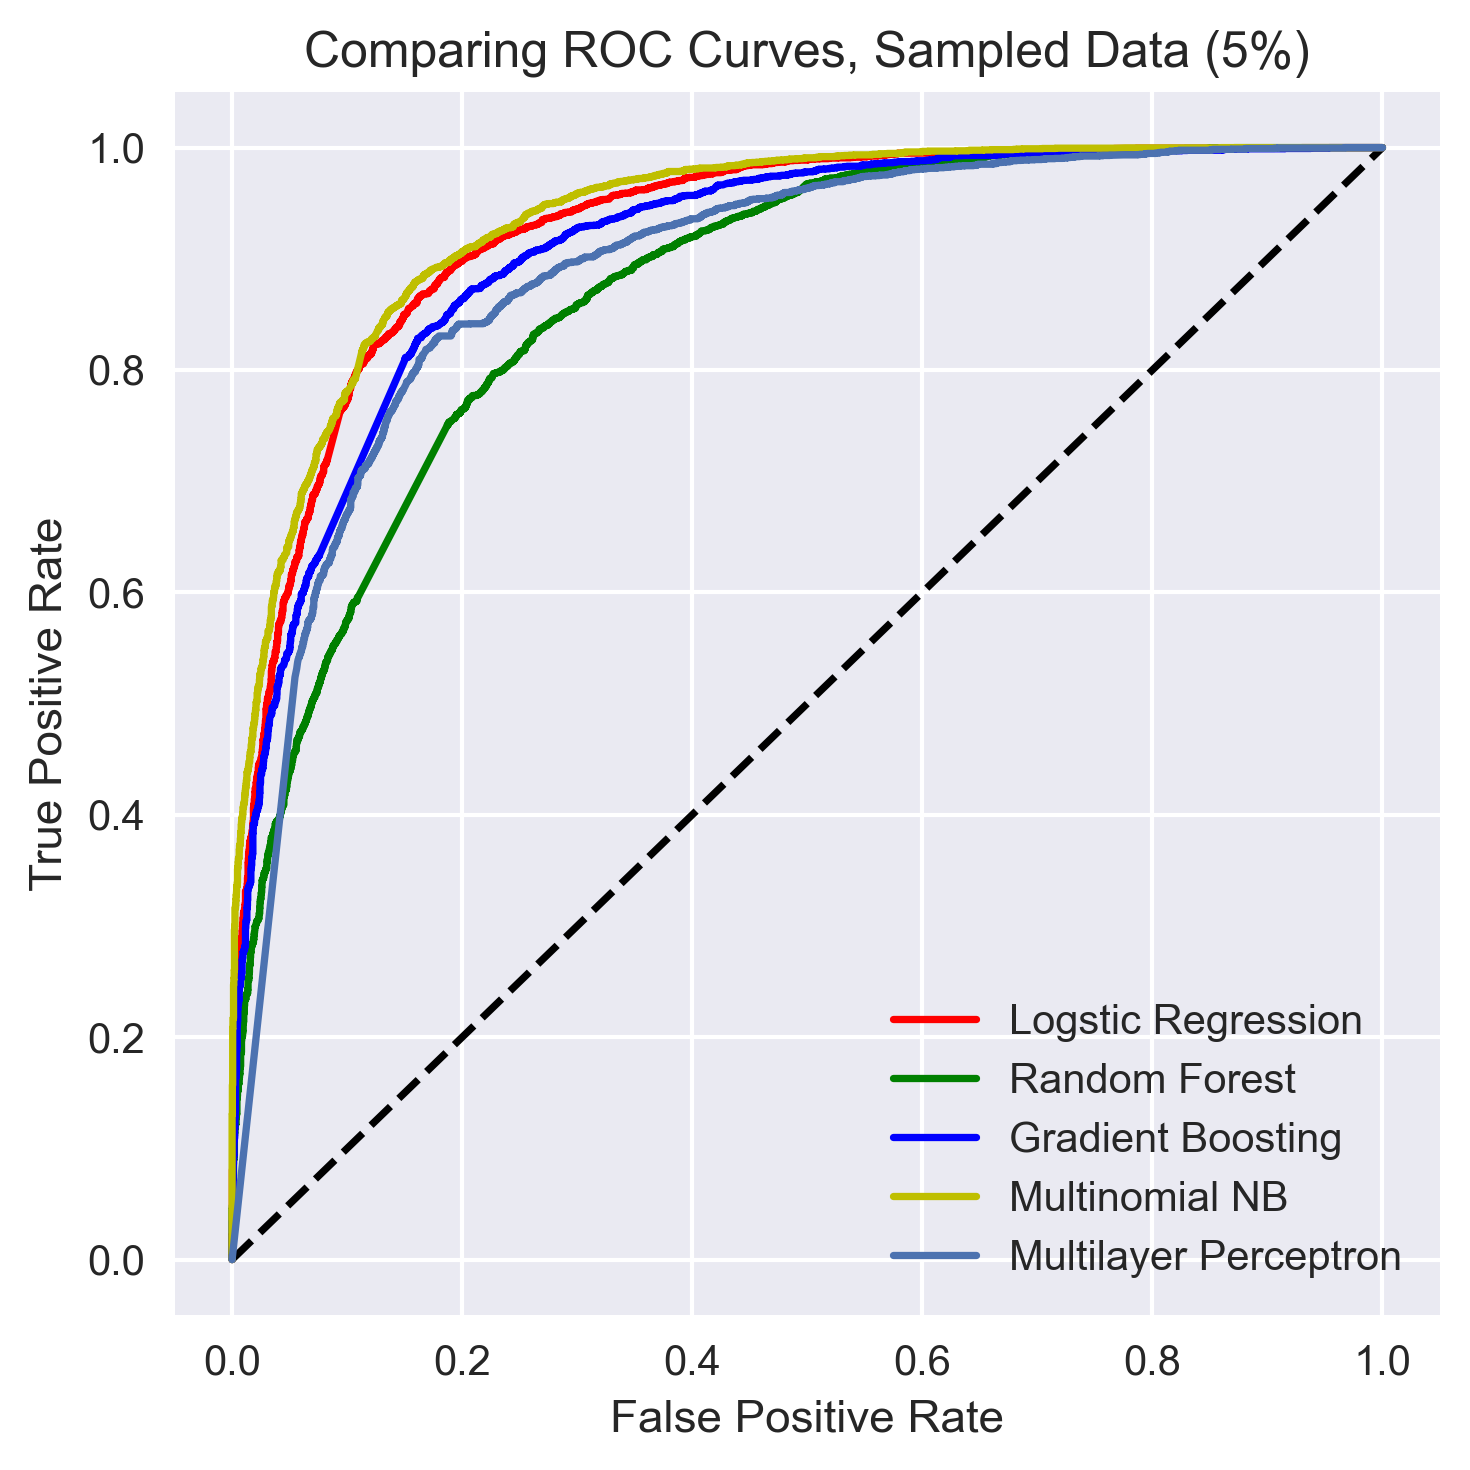

In [55]:
plt.style.use('seaborn')
fig = plt.figure(num=None, figsize=(5, 5), dpi=300, tight_layout=True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, 'r-', label='Logstic Regression')
plt.plot(fpr_rf, tpr_rf, 'g-', label='Random Forest')
plt.plot(fpr_gboost, tpr_gboost, 'b-', label='Gradient Boosting')
plt.plot(fpr_multiNB, tpr_multiNB, 'y-', label='Multinomial NB')
plt.plot(fpr_mlp, tpr_mlp, label='Multilayer Perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC Curves, Sampled Data (5%)')
plt.legend()
plt.show()
fig.savefig('../results/roc_curves.png', dpi=fig.dpi)

----